In this worked notebook file,the Logistic Regression algorithm is applied to a dataset called wildfires.

The dataset has already been split into two different sets: one for training (wildfires_training.csv) and one for testing (wildfires_test.csv)

The dependent variable that we are trying to predict is fire, which can be one of 2 classes: yes or no.

In [2]:
import pandas as pd

# details for beer dataset
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code", "buildup_index", "day", "month", "wind_speed"]

dependent_col = "fire"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [3]:
# set up a matrix X containing the independent variables from the training data
X_training = df_training.loc[:,independent_cols]
print(X_training.head())
print(X_training.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [4]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_training = df_training.loc[:,dependent_col]
print(y_training.head())
print(y_training.shape)

0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object
(154,)


In [5]:
# Next we load our test dataset in from the file iris_test.csv
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [6]:
# set up a matrix X containing the independent variables from the test data
X_test = df_test.loc[:,independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [7]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_test = df_test.loc[:,dependent_col]
print(y_test.head())
print(y_test.shape)

0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object
(50,)


No hyperparameter tuning, default skikit-learn implementation

In [10]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# create a logistic regression model using default settings
model = LogisticRegression(max_iter=1000)
model.fit(X_training, y_training)

# compute predictions for training and test sets
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# compute accuracy for training and test sets
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print("Accuracy on training data:", accuracy_training)
print("Accuracy on test data:", accuracy_test)

Accuracy on training data: 0.9090909090909091
Accuracy on test data: 0.9


In [13]:
import numpy as np
# Now let's evaluate the effect of using different C values

c_values = c_values = c_values = np.linspace(0.001, 100, 12)
print("C-values", c_values)

accuracy_training_c = []
accuracy_test_c = []
for c in c_values:
    model_c = LogisticRegression(C=c, max_iter=1000)
    model_c.fit(X_training, y_training)

    # compute the predictions for the training and test sets
    predictions_training_c = model_c.predict(X_training)
    predictions_test_c = model_c.predict(X_test)

    # compute the accuracy on the training and test set predictions
    accuracy_training_c.append(metrics.accuracy_score(y_training, predictions_training_c))
    accuracy_test_c.append(metrics.accuracy_score(y_test, predictions_test_c))

print("Accuracy on training data with different C values", accuracy_training_c)
print("Accuracy on test data with different C values", accuracy_test_c)

C-values [1.00000000e-03 9.09181818e+00 1.81826364e+01 2.72734545e+01
 3.63642727e+01 4.54550909e+01 5.45459091e+01 6.36367273e+01
 7.27275455e+01 8.18183636e+01 9.09091818e+01 1.00000000e+02]
Accuracy on training data with different C values [0.8636363636363636, 0.922077922077922, 0.9285714285714286, 0.935064935064935, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286]
Accuracy on test data with different C values [0.82, 0.88, 0.88, 0.88, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]


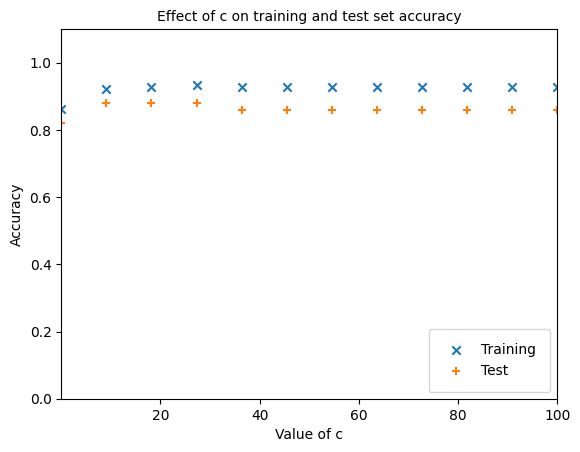

In [15]:
# let's plot the accuracy on the training and test set
import matplotlib.pyplot as plt
plt.scatter(c_values,accuracy_training_c,marker="x")
plt.scatter(c_values,accuracy_test_c,marker="+")
plt.xlim([min(c_values), max(c_values)])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of c")
plt.ylabel("Accuracy")
legend_labels = ["Training","Test"]
plt.legend(labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of c on training and test set accuracy", fontsize=10)
plt.show()

In [25]:
max_iter_values = [100, 200, 500, 1000]

accuracy_training_c_mi = []
accuracy_test_c_mi = []

for mi in max_iter_values:
    acc_train = []
    acc_test = []
    for c in c_values:
        model = LogisticRegression(C=c, max_iter=mi)
        model.fit(X_training, y_training)
        pred_train = model.predict(X_training)
        pred_test = model.predict(X_test)
        acc_train.append(metrics.accuracy_score(y_training, pred_train))
        acc_test.append(metrics.accuracy_score(y_test, pred_test))
    accuracy_training_c_mi.append(acc_train)
    accuracy_test_c_mi.append(acc_test)
print(f"max_iter={mi} training:", accuracy_training_c_mi)
print(f"max_iter={mi} test:", accuracy_test_c_mi)

/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

max_iter=1000 training: [[0.8636363636363636, 0.9025974025974026, 0.8896103896103896, 0.8896103896103896, 0.9025974025974026, 0.8961038961038961, 0.8766233766233766, 0.8831168831168831, 0.8896103896103896, 0.8896103896103896, 0.8961038961038961, 0.8961038961038961], [0.8636363636363636, 0.9155844155844156, 0.9285714285714286, 0.9090909090909091, 0.9285714285714286, 0.9025974025974026, 0.922077922077922, 0.9025974025974026, 0.9155844155844156, 0.8961038961038961, 0.922077922077922, 0.9090909090909091], [0.8636363636363636, 0.922077922077922, 0.9285714285714286, 0.935064935064935, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286], [0.8636363636363636, 0.922077922077922, 0.9285714285714286, 0.935064935064935, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286]]
max_iter=1000

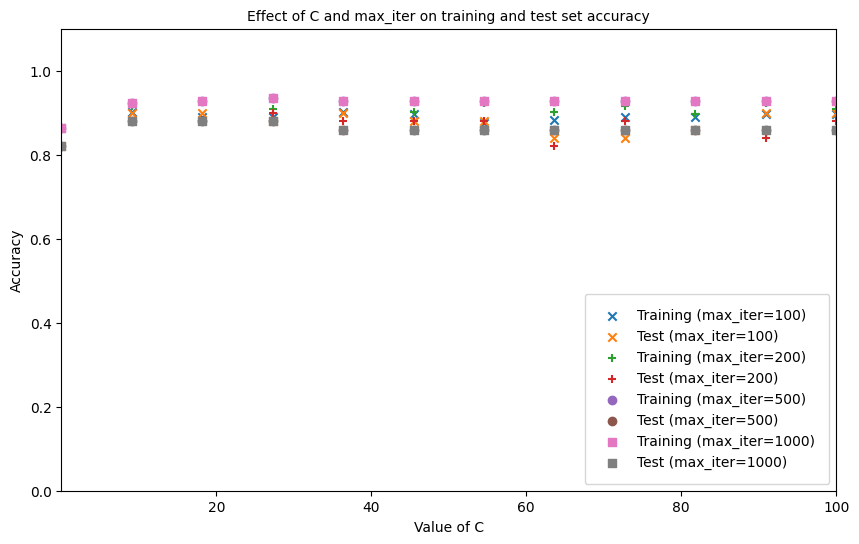

In [26]:

plt.figure(figsize=(10, 6))
markers = ["x", "+", "o", "s"]  # Different markers for each max_iter

for idx, mi in enumerate(max_iter_values):
    plt.scatter(c_values, accuracy_training_c_mi[idx], marker=markers[idx], label=f"Training (max_iter={mi})")
    plt.scatter(c_values, accuracy_test_c_mi[idx], marker=markers[idx], label=f"Test (max_iter={mi})")

plt.xlim([min(c_values), max(c_values)])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
plt.legend(loc=4, borderpad=1)
plt.title("Effect of C and max_iter on training and test set accuracy", fontsize=10)
plt.show()